# Sentiment Analysis on News Articles & Stock Prices

In this project, we aim to understand the changes in Facebook stockprices by performing sentiment analysis on the recent news on Facebook.

- News regarding Facebook will be taken off BusinessTimes
- Facebook stocks are taken off Yahoo! Finance


**Packages to install & import**
- pandas
- nltk 
- numpy
- matplotlib
- beautifulsoup4 
- yfinance

**To be download**
- vader_lexicon

In [11]:
#!pip install ntlk
import nltk
#nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

#!pip install pandas
import pandas as pd

#!pip install numpy
from numpy import *

#!pip install matplotlib
import matplotlib.pyplot as plt

import datetime as dt

#!pip install yfinance
import yfinance as yf

sia = SentimentIntensityAnalyzer()

**BeautifulSoup**
- python library for pulling data out of HTML files
- soup.prettify() will display document (HTML codes) as a nested data structure
- soup.p display the paragraph tag <p> in HTML
- soup.findall("...") will find all HTML codes with the specified tags 
****
 
**VADER** 

***5 Heuristics used:***
- Punctuation
- Capitalisation
- Degree Modifiers (use of intensifiers)
- Conjunctions (shift in sentiment polarity with latter one dictating polarity)
- Preceding Tri-gram (identify reverse polarity by examining tri-gram before lexical feature)


***3 Sentiment Scores ranging from 0 to 1***
- Negative --> sia.polarity_scores(...<passage>...)["neg"]
- Neutral --> sia.polarity_scores(...<passage>...)["neu"]
- Positive --> sia.polarity_scores(...<passage>...)["pos"]
    
***Compound Sentiment Score ranging from -1 to 1***
- Compound --> sia.polarity_scores(...<passage>...)["compound"]
    - Overall Positive: compound_sentiment_score >=0.05
    - Overall Neutral: compound_sentiment_score > -0.05
    - Overall Negative: compound_sentiment_score <= -0.05

In [12]:
from urllib.request import urlopen   # get request to url
from urllib.error import HTTPError
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}


# Based on the searches on businesstimes, we search "facebook" and scrap each pages' articles
for i in range(1,10):
    page = urlopen('https://www.businesstimes.com.sg/search/facebook?page='+str(i)).read()
    soup = BeautifulSoup(page, features="html.parser")  #parsing facebook using html.parser from BeautifulSoup, to extract text values from html pages
    posts = soup.findAll("div", {"class": "media-body"}) #extract text by finidng html tags. 
    for post in posts:
        time.sleep(1)
        url = post.a['href']   #href is the html tag where the url for a website is found
        date = post.time.text
        print(date, url)    # printing the date and url that is extracted
        try:
            link_page = urlopen(url).read()
        except HTTPError as e:
            print(e) 
        except:
            url = url[:-2]
            link_page = urlopen(url).read()
        
                
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

18 Sep 2019 https://www.businesstimes.com.sg/consumer/washington-post-ad-tech-platform-aims-at-google-facebook-duopoly
18 Sep 2019 https://www.businesstimes.com.sg/technology/vietnams-social-media-crowd-swells-with-new-entrant-to-take-on-google-facebook
17 Sep 2019 https://www.businesstimes.com.sg/technology/facebook-to-stop-news-headline-changes-from-advertisers
14 Sep 2019 https://www.businesstimes.com.sg/consumer/google-and-facebooks-latest-efforts-to-save-journalism-are-already-getting-eye-rolls
14 Sep 2019 https://www.businesstimes.com.sg/technology/facebook-fact-checker-finds-uk-conservatives-ran-ads-with-altered-bbc-headline
13 Sep 2019 https://www.businesstimes.com.sg/banking-finance/eu-regulators-to-set-high-bar-to-authorise-facebooks-libra
12 Sep 2019 https://www.businesstimes.com.sg/technology/you-cant-go-to-college-with-your-kid-but-you-can-pretend-on-facebook
11 Sep 2019 https://www.businesstimes.com.sg/banking-finance/facebooks-libra-seeks-swiss-payment-system-licence
10 

02 Jul 2019 https://www.businesstimes.com.sg/technology/facebook-to-broaden-effort-to-root-out-white-nationalist-content
02 Jul 2019 https://www.businesstimes.com.sg/technology/facebook-developing-policy-to-ban-census-interference
02 Jul 2019 https://www.businesstimes.com.sg/technology/social-media-sales-soar-in-facebook-friendly-thailand
01 Jul 2019 https://www.businesstimes.com.sg/technology/facebook-to-ban-census-interference-to-allay-undercount-worries
01 Jul 2019 https://www.businesstimes.com.sg/consumer/from-shrimp-to-fake-eyelashes-social-media-sales-soar-in-facebook-friendly-thailand
01 Jul 2019 https://www.businesstimes.com.sg/government-economy/facebook-will-ban-ads-that-tell-people-in-us-not-to-vote
28 Jun 2019 https://www.businesstimes.com.sg/technology/facebook-did-not-address-hack-on-popular-grief-support-page-for-weeks-moderators-say
28 Jun 2019 https://www.businesstimes.com.sg/opinion/many-things-not-to-like-about-facebooks-libra-cryptocurrency
27 Jun 2019 https://www.b

In [13]:
# Converting Dict to Pandas Dataframe
score = pd.DataFrame.from_dict(date_sentiment, orient = "index", columns = ["Sentiment_Score"])
print(score)

            Sentiment_Score
2019-09-19            0.749
2019-09-18           -0.341
2019-09-15            0.967
2019-09-14            0.069
2019-09-13            0.998
2019-09-12           -0.873
2019-09-11            0.513
2019-09-07            0.715
2019-09-06            0.933
2019-09-05            0.851
2019-08-30           -0.908
2019-08-27            0.882
2019-08-25            0.220
2019-08-23            0.636
2019-08-22           -0.103
2019-08-21            0.269
2019-08-16            0.987
2019-08-15            0.336
2019-08-09           -0.870
2019-08-08           -0.870
2019-08-07           -0.389
2019-08-06            0.787
2019-08-04            0.847
2019-08-03            0.190
2019-08-02            0.071
2019-08-01           -0.977
2019-07-30            0.790
2019-07-28           -0.434
2019-07-27            0.796
2019-07-26            0.981
2019-07-25           -0.086
2019-07-19            0.883
2019-07-18            0.962
2019-07-17            0.986
2019-07-16          

In [14]:
# We will be looking at the closing price for each day to determine changes in stock prices over time
# Crawling Yahoo Finance's Facebook data for the months of June to September 2019, past 4 months
# Stock Ticker for Facebook is FB

fb = yf.Ticker("FB")
print(fb)

# Getting the historic Facebook data for the past 4 months
fb_hist = fb.history(period = "4mo")
print(fb_hist)

yfinance.Ticker object <FB>
                  Open        High         Low       Close    Volume  \
Date                                                                   
2019-05-20  181.880005  184.229996  181.369995  182.720001  10352000   
2019-05-21  184.570007  185.699997  183.889999  184.820007   7502800   
2019-05-22  184.729996  186.740005  183.610001  185.320007   9213800   
2019-05-23  182.419998  183.899994  179.669998  180.869995  12768800   
2019-05-24  182.330002  183.630005  180.830002  181.059998   8807700   
2019-05-28  181.539993  184.710007  181.449997  184.309998  14843300   
2019-05-29  183.500000  184.559998  181.350006  182.190002  12797700   
2019-05-30  183.080002  183.479996  180.889999  183.009995   8581500   
2019-05-31  180.279999  180.539993  177.160004  177.470001  15226500   
2019-06-03  175.000000  175.050003  161.009995  164.149994  56059600   
2019-06-04  163.710007  168.279999  160.839996  167.500000  46044300   
2019-06-05  167.479996  168.720001  

In [15]:
# Taking out only the dates and the closing prices 
start = fb_hist.index.searchsorted(dt.datetime(2019, 6, 15))
end = fb_hist.index.searchsorted(dt.datetime(2019, 9, 13))
temp = fb_hist.iloc[start:end]
fb_data = temp[["Close"]]
fb_data.head()

,Close
Date,
2019-06-17,189.009995
2019-06-18,188.470001
2019-06-19,187.479996
2019-06-20,189.529999
2019-06-21,191.139999


In [16]:
# Creating a categorical variable to determine whether the stock prices increase or decrease from the previous day
fb_data["Changes"] = ""
for i in range (1, len(fb_data)):
    fb_data["Changes"][i] = fb_data["Close"][i] - fb_data["Close"][i-1]

fb_data.head()

,Close,Changes
Date,,
2019-06-17,189.009995,
2019-06-18,188.470001,-0.539993
2019-06-19,187.479996,-0.990005
2019-06-20,189.529999,2.05
2019-06-21,191.139999,1.61


In [17]:
merged = pd.merge(fb_data, score, how = "left", left_index = True, right_index = True)
merged = merged.dropna()
merged.head()

,Close,Changes,Sentiment_Score
Date,,,
2019-06-20,189.529999,2.05,0.814
2019-06-21,191.139999,1.61,0.997
2019-06-26,187.660004,-1.17999,-0.270
2019-06-27,189.500000,1.84,-0.194
2019-06-28,193.000000,3.5,0.842


In [18]:
relation = merged[["Changes", "Sentiment_Score"]]

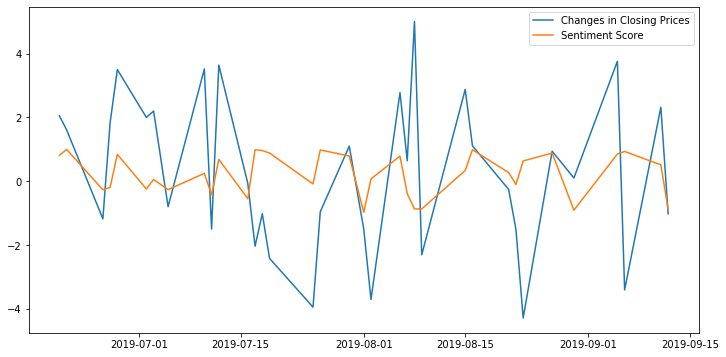

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(relation.index, relation.Changes, label="Changes in Closing Prices")
plt.plot(relation.index, relation.Sentiment_Score, label = "Sentiment Score")
plt.legend()
plt.show()